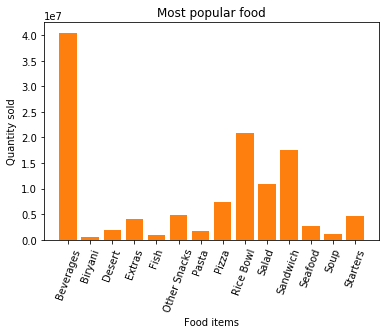

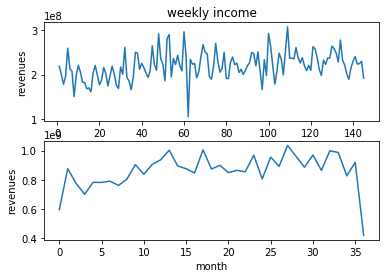

In [26]:
'''Note: 

* Before writing any code remember that this assigment is for helping you understand the basics of file
handling in csv file. 

* This project is designed to have a work flow such that everyone is in same page for this purpose the variables are
given a strict name which should not be changed or modified according to your convinience

* Few of new functions like .head() .xticks().... and concepts may have been introduced in the assingment, so we encourage you
all to go through them without skipping.

*  functions which are to be used in the Your code sections are globally available so try to look for those where you have been prompted
'''

'''Its the data of a meal delivery company which operates in multiple cities. 
They have various fulfillment centers in these cities for dispatching meal orders to their customers.
train.csv: Historical data of demand for a product-center combination 
fulfilment_center_info.csv: Information for fulfillment center like center area, city information etc.
meal_info.csv: Product(Meal) features such as category, sub-category, current price and discount'''


'''START CODE'''

#Import necessary libraries: Numpy,pandas,matplotlib

'''************************Your code here**********************'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

'''************************************************************'''
 

#read meal_info.csv file from provided dataset into a df_meal named variable
#Note: Proper file directory should be provided

'''************************Your code here**********************'''
df_meal = pd.read_csv('E:\meal_info1.csv')

'''************************************************************'''


df_meal.head()
'''This is for displaying first five data points'''


#read fulfilment_center_info.csv file from provided dataset
#Note: Proper file directory should be provided

'''************************Your code here**********************'''
df_center =  pd.read_csv('E:\\fulfilment_center_info2.csv')
'''************************************************************'''

df_center.head()
'''This is for displaying first five data points'''

#read train.csv file from provided dataset
#Note: Proper file directory should be provided

'''************************Your code here**********************'''
df_food = pd.read_csv('E:\\train0.csv')
'''************************************************************'''

df_food.head()

'''Since the provided information is in different files, your work here is to merge them.Look for the functions
in pandas library to do so'''

'''************************Your code here**********************'''
A=pd.merge(df_food,df_center, on ="center_id")
df=pd.merge(A,df_meal,on ="meal_id")

'''************************************************************'''

'''Here we have used pd.pivot_table() kindly go through the function and mention in comment what it does'''

table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)



'''Graph tweaking
************************
Plot a bar graph with title 'Most popular food' for category(x-axis) vs number-of-orders(y-axis)

give x label 'Food items'
give y label 'Quantity sold'


'''

'''************Yourcode*********************'''

#bar graph
A =table['num_orders'].tolist()
B = list(table.index.values)
plt.bar(B,A)

#xticks 
plt.xticks(rotation=70) 
'''Write on comment what you feel this function does'''
# it rotates the headings(ticks) on x-axix
#x-axis labels 
plt.xlabel("Food items")

#y-axis labels 
plt.ylabel("Quantity sold")

#plot title 
plt.title("Most popular food")


#save plot 
plt.savefig('C:\\Users\\Azeem-Hp\\Desktop\\0_asg.png')

#display 
plt.bar(B,A)
plt.show()
'''************************************************'''


'''Comparison of weekly and monthly sales
 Create a new column
* named 'revenue' where each element is product of checkout_price and num_orders 
** named 'month' by using ['week'] column (week column value divided by 4 gives month value)'''



'''**************************Your code******************************'''
df["revenue"]=df["num_orders"]*df["checkout_price"]
df["month"]=df["week"]//4

'''******************************************************************'''
'''Here we have created two list month and month_order ,
store month number in month list and revenue of each month in month_order'''
#list to store month-wise revenue 


'''***********************************Your code***********************'''
Q=pd.pivot_table(data=df,index='month',values='revenue',aggfunc=np.sum)

month=list(Q.index.values)

month_order=Q["revenue"].tolist()
    
'''*********************************************************************'''
'''Here we have created two list week and week_order ,you need to store in them mapping the monthly orders'''    
#list to store week-wise revenue 


'''***********************************Your code***********************'''
W=pd.pivot_table(data=df,index='week',values='revenue',aggfunc=np.sum)

week=list(W.index.values)

week_order=W["revenue"].tolist()

'''*********************************************************************'''
''' Plot two subplots in the same space : one for weekly revenue and other for monthly revenue.
For weekly : Title(Weekly income),x_label(week),y_label(revenue); similarly for monthly revenue.
'''

'''************Yourcode*********************'''

plt.subplot(2, 1, 1)
plt.plot(week, week_order)
plt.title('weekly income')
plt.ylabel('revenues')
plt.xlabel("week")

plt.subplot(2, 1, 2)
plt.plot(month, month_order)
plt.ylabel('revenues')
plt.xlabel("month")

''' Display the plot'''
plt.show()